<a href="https://colab.research.google.com/github/rayouaz/ComparativeAFTrashRecycling/blob/master/CV_Relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re

In [0]:
torch.cuda.is_available()
??get_transforms??
zipped_no = "dataset-resized.zip"
zipped_da = "dataset-resized-augment.zip"

In [3]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [4]:
files = zf.ZipFile(zipped_no,'r')
files.extractall()
files.close()
os.listdir(os.path.join(os.getcwd(),"dataset-resized"))

['trash', 'cardboard', '.DS_Store', 'metal', 'glass', 'plastic', 'paper']

In [0]:
## get a path to the folder with images
path = Path(os.getcwd())/"dataset-resized"
path
??get_transforms??

In [0]:
tfms = get_transforms(do_flip=True,flip_vert=True, xtra_tfms = rand_resize_crop(224))
data = (ImageList.from_folder(path)
  .split_none()
  .label_from_folder()
  .transform(tfms, size=224)
  .databunch(bs=16)).normalize()

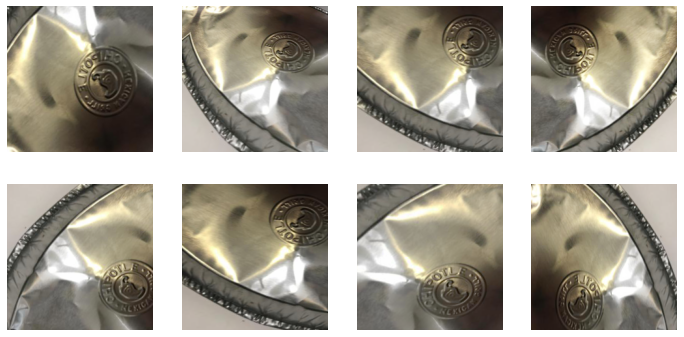

In [9]:
data

def get_ex(): return open_image(os.getcwd()+"/dataset-resized/metal/metal11.jpg")

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

plots_f(2,4,12,6,size=224)

In [10]:
print(data.classes)
??cnn_learner??

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [0]:
torch.cuda.empty_cache()

Fold = 1


Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/checkpoints/densenet169-b2777c0a.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.993644,0.451997,0.150198,00:41
1,0.710354,0.392681,0.128458,00:38
2,0.671961,0.373163,0.122530,00:38
3,0.731338,0.455358,0.132411,00:38
4,0.577665,0.396165,0.116601,00:38
5,0.650102,0.487350,0.142292,00:38
6,0.685410,1.089229,0.258893,00:39
7,0.679911,0.657176,0.183794,00:39
8,0.731191,0.493633,0.120553,00:38
9,0.724057,0.556448,0.158103,00:39


Fold = 1


Fold = 2


epoch,train_loss,valid_loss,error_rate,time
0,1.078550,0.480443,0.167984,00:38
1,0.766623,0.497784,0.144269,00:38
2,0.686530,0.466418,0.148221,00:38
3,0.647535,0.532072,0.142292,00:38
4,0.528117,0.587856,0.154150,00:38
5,0.592992,0.549376,0.169960,00:38
6,0.647031,0.759111,0.209486,00:38
7,0.720468,0.541597,0.175889,00:38
8,0.622324,0.562042,0.179842,00:38
9,0.706476,0.562151,0.181818,00:39


Fold = 2


Fold = 3


epoch,train_loss,valid_loss,error_rate,time
0,1.092418,0.529947,0.196040,00:39
1,0.742741,0.398014,0.132673,00:39
2,0.682329,0.406929,0.140594,00:38
3,0.630869,0.530643,0.152475,00:38
4,0.626228,0.349641,0.132673,00:38
5,0.628005,0.506483,0.162376,00:38
6,0.659266,0.538502,0.170297,00:38
7,0.745642,0.560738,0.170297,00:38
8,0.674232,0.613812,0.192079,00:38
9,0.671472,1.025353,0.271287,00:38


Fold = 3


Fold = 4


epoch,train_loss,valid_loss,error_rate,time
0,1.032174,0.468352,0.154455,00:37
1,0.698520,0.431224,0.124752,00:37
2,0.701373,0.522980,0.152475,00:38
3,0.608075,0.439727,0.140594,00:38
4,0.686505,0.389923,0.128713,00:38
5,0.664718,0.438325,0.148515,00:38
6,0.705793,0.654214,0.219802,00:38
7,0.692250,0.449121,0.152475,00:38
8,0.729329,0.589157,0.170297,00:38
9,0.676957,0.552860,0.180198,00:38


Fold = 4


Fold = 5


epoch,train_loss,valid_loss,error_rate,time
0,1.064378,0.493371,0.164356,00:38
1,0.760503,0.423716,0.124752,00:38
2,0.676042,0.438429,0.144554,00:38
3,0.660631,0.565139,0.154455,00:39
4,0.616224,0.470028,0.142574,00:38
5,0.592666,0.658112,0.176238,00:38
6,0.682130,0.986808,0.223762,00:38
7,0.770468,0.433447,0.140594,00:38
8,0.726605,0.686427,0.184158,00:38
9,0.735752,0.719721,0.201980,00:38


Fold = 5


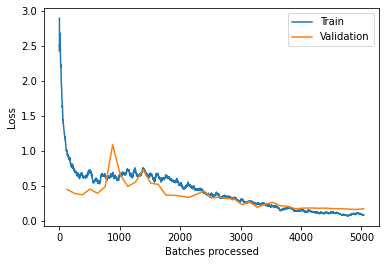

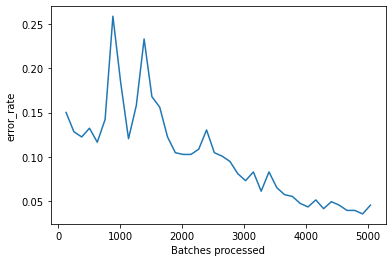

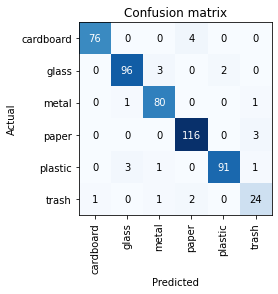

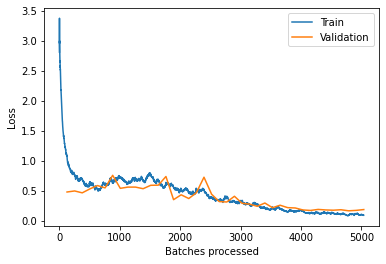

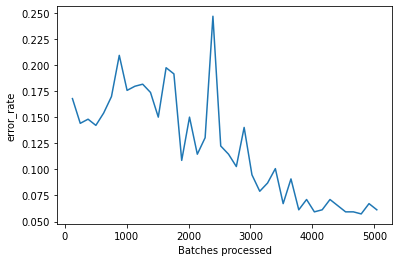

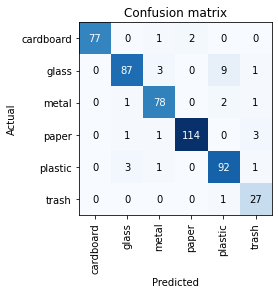

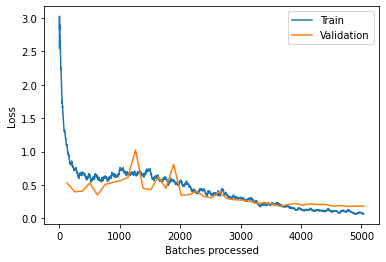

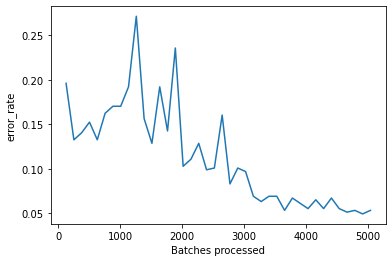

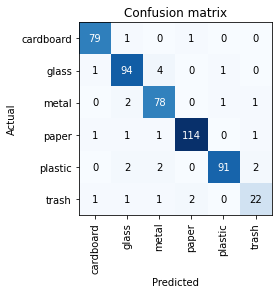

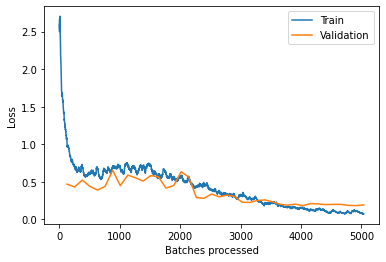

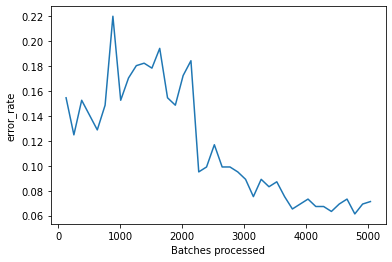

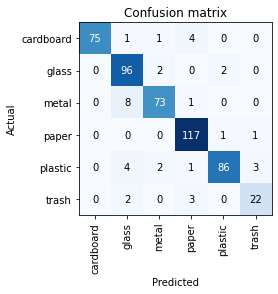

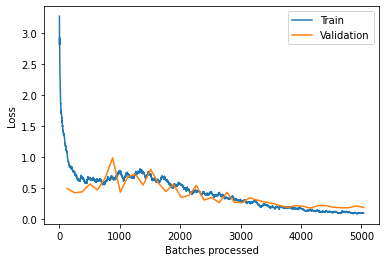

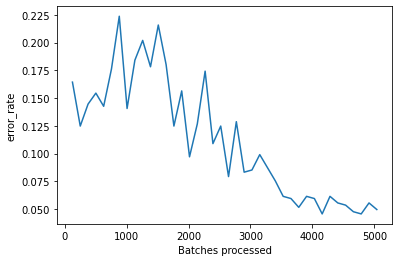

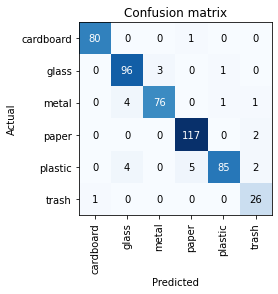

In [12]:
torch.cuda.empty_cache()
from sklearn.model_selection import StratifiedKFold
import numpy
acc_val = []
numpy.array([1,2,3])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
df = data.to_df()
df.head()
i=0
for train_index, val_index in skf.split(df.index, df['y']):
  i+=1
  data_fold = (ImageList.from_df(df, path)
  .split_by_idxs(train_index, val_index)
  .label_from_df()
  .transform(tfms, size=224)
  .databunch(bs=16)).normalize()
  print("Fold = " + str(i))
  learn = cnn_learner(data_fold,models.densenet169,metrics=error_rate)
  learn.fit_one_cycle(40,max_lr=5.13e-03)
  print("Fold = " + str(i))
  learn.recorder.plot_losses()
  learn.recorder.plot_metrics()
  inter = ClassificationInterpretation.from_learner(learn)
  inter.plot_confusion_matrix()
  loss,acc = learn.validate()
  acc_val.append(acc.numpy())

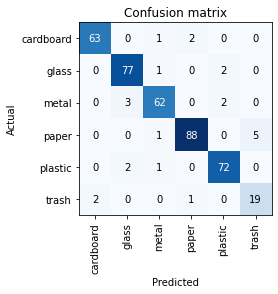

In [0]:
inter = ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()

In [13]:
#learn.model

print("acc mean:" +str(1-numpy.mean(acc_val)))
print("acc std:" +str(numpy.std(acc_val)))

acc mean:0.943804644048214
acc std:0.0091764955
